In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

## Testing with _Rushing_

In [2]:
def data_scrape_rush(year: int):
    # Define the URL that's going to be used to search for the data.
    url = "https://www.pro-football-reference.com/years/" + str(year)+"/rushing.htm"
    # Set the reading for the table found in the site established before.
    html = pd.read_html(url, header=1)
    rushing_df = html[0]
    clean_data = rushing_df.drop(rushing_df[rushing_df.Age == 'Age'].index)
    clean_data = clean_data.fillna(0)
    rushing_players = clean_data.drop(['Rk'], axis=1)
    rushing_players[["Age", "G", "GS", "Att", "Yds", "TD", "1D", "Lng", "Y/A", "Y/G", "Fmb"]] = rushing_players[[
        "Age", "G", "GS", "Att", "Yds", "TD", "1D", "Lng", "Y/A", "Y/G", "Fmb"]].apply(pd.to_numeric)

    rushing_players.reset_index(drop=True, inplace=True)

    rushing_players.loc[rushing_players['Pos'] == 0, ['Pos']] = "No Pos"

    rushing_players["Player"] = rushing_players["Player"].map(
        lambda x: x.rstrip('*+'))

    rushing_players.sort_values(by="Yds", inplace=True, ascending=False)
    rushing_players.reset_index(drop=True, inplace=True)

    return rushing_players


In [3]:
player_stats = data_scrape_rush(2022)
player_stats

,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,Josh Jacobs,LVR,24,RB,17,17,340,1653,12,93,86,4.9,97.2,3
1,Derrick Henry,TEN,28,RB,16,16,349,1538,13,65,56,4.4,96.1,6
2,Nick Chubb,CLE,27,RB,17,17,302,1525,12,69,41,5.0,89.7,1
3,Saquon Barkley,NYG,25,RB,16,16,295,1312,10,62,68,4.4,82.0,1
4,Miles Sanders,PHI,25,RB,17,15,259,1269,11,62,40,4.9,74.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Jahan Dotson,WAS,22,WR,12,10,2,-7,0,0,3,-3.5,-0.6,0
362,David Njoku,CLE,26,TE,14,14,2,-8,0,0,-2,-4.0,-0.6,1
363,Jakobi Meyers,NWE,26,WR,14,13,2,-11,0,2,7,-5.5,-0.8,2
364,DeAndre Carter,LAC,29,WR,17,7,2,-15,0,0,-5,-7.5,-0.9,3


## One player's analysis

In [4]:
def plotting_plyr_rush(player_df, player_name):
    player_plt = pd.DataFrame(columns=player_df.columns)
    temp_df_dat = player_df.loc[player_df["Player"] == player_name]

    player_plt = player_plt.append(temp_df_dat, ignore_index=True)

    player_plt.drop(labels=["Player", "Tm", "Pos","Age"], inplace=True, axis=1)

    return player_plt

In [5]:
player_to_check="Christian McCaffrey"

In [6]:
plot_data = plotting_plyr_rush(player_df=player_stats, player_name=player_to_check)
plot_data

/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_27954/2677964672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_plt = player_plt.append(temp_df_dat, ignore_index=True)


,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,17,16,244,1139,8,59,49,4.7,67.0,1


#### Plotting one player

[Text(0.5, 1.0, "Christian McCaffrey's stats")]

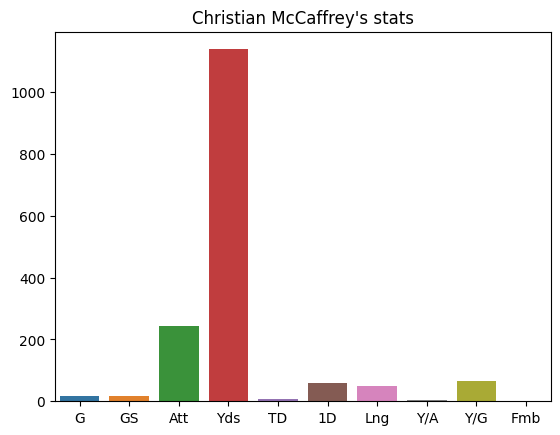

In [7]:
sns.barplot(data=plot_data).set(title=f"{player_to_check}'s stats")

## Two player's analysis

In [8]:
def compare_players_df_rush(player_1_data, player_2_data, player_1_name, player_2_name):
    player_comp_df = pd.DataFrame(columns=player_1_data.columns)
    player_comp_df = player_comp_df.append(player_1_data, ignore_index=True)

    player_comp_df.insert(loc=0, column="Player", value=[
                          [player_1_name, player_2_name]])

    player_comp_df.at[0, "Player"] = player_1_name

    player_comp_df = player_comp_df.append(player_2_data, ignore_index=True)

    player_comp_df.at[1, "Player"] = player_2_name

    return player_comp_df


In [9]:
second_player = "Deebo Samuel"


In [10]:
player_2_cmpr = plotting_plyr_rush(player_df=player_stats, player_name=second_player)
player_2_cmpr

/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_27954/2677964672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_plt = player_plt.append(temp_df_dat, ignore_index=True)


,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,13,12,42,232,3,8,51,5.5,17.8,3


In [11]:
data_comp = compare_players_df_rush(player_1_data=plot_data, player_2_data=player_2_cmpr, player_1_name=player_to_check, player_2_name=second_player)
data_comp

/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_27954/1281590573.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_comp_df = player_comp_df.append(player_1_data, ignore_index=True)
/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_27954/1281590573.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_comp_df = player_comp_df.append(player_2_data, ignore_index=True)


,Player,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,Christian McCaffrey,17,16,244,1139,8,59,49,4.7,67.0,1
1,Deebo Samuel,13,12,42,232,3,8,51,5.5,17.8,3


#### Plotting two players

In [12]:
# data_comp.set_index("Player", inplace=True)
# data_comp.reset_index(inplace=True)
# test_gb = data_comp.groupby(["Player"])
test_1 = data_comp.set_index("Player")
test_t = test_1.T
test_t.drop(["level_0","index"], axis=0, inplace=True)

KeyError: "['level_0', 'index'] not found in axis"

In [13]:
customColors = ListedColormap(["#013369", "#D50A0A"])


<AxesSubplot: title={'center': 'Player comparisons between Christian McCaffrey and Deebo Samuel'}, xlabel='Stats'>

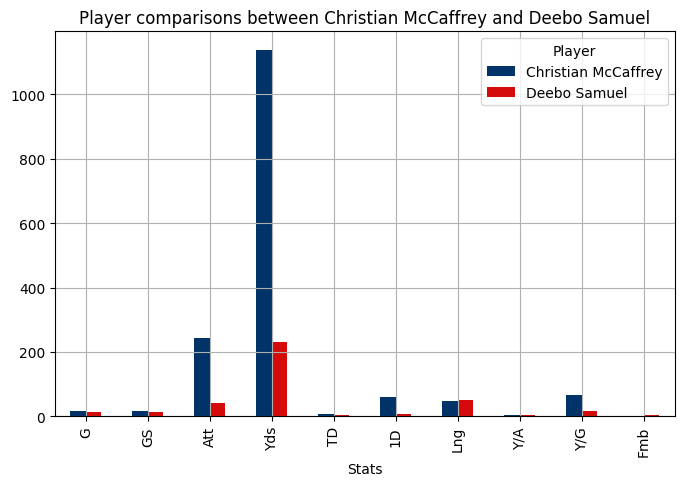

In [14]:
test_t.plot(kind="bar", title=f"Player comparisons between {player_to_check} and {second_player}",
            xlabel="Stats", subplots=False, figsize=(8, 5), legend=True, grid=True, colormap=customColors, )
